In [21]:
# Setup
import csv
import time
import random
import sys
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import string
import re
from scipy.sparse import csr_matrix
import math
import pickle
import scipy

from twython import Twython, TwythonError, TwythonRateLimitError

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib

import nltk
import gensim

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import TruncatedSVD

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)


# On impose la seed du pseudo-random number generator pour assurer la répétabilité de nos résultats
random.seed(42)

In [7]:
# dummy function that returns what it has been passed. 
# Je ne savais pas que l'on pouvait inclure un pre-processor et un tokenizer directement dans TfidfVectorizer

def dummy_function(doc):
    return doc

In [10]:
%%time
############################################################################### On load les df
df = pd.read_pickle("df.pkl")
df_eng = pd.read_pickle("df_eng.pkl")
df_sample = pd.read_pickle("df_sample.pkl")

############################################################################### On load notre liste de liste de tokens
with open('filtered_tokens.pkl', 'rb') as f:
    filtered_tokens = pickle.load(f)
    
################################################################################ On load les vectorizer
# unigram
with open(r"tfidf_sample.pickle", "rb") as input_file:
    tfidf = pickle.load(input_file)
    
# unigram et bigram
with open(r"tfidf_sample_bigram.pickle", "rb") as input_file:
    tfidf_bigram = pickle.load(input_file)
    
################################################################################ On load les matrices de tfidf
# unigram
tfidf_mat= scipy.sparse.load_npz('tfidf_mat_sample.npz')

# unigram et bigram
tfidf_bigram_mat= scipy.sparse.load_npz('tfidf_bigram_mat_sample.npz')

Wall time: 7.75 s


In [5]:
%%time
random.seed(42)

# kmeans
km_2 = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=1, 
            max_iter=100,
            random_state=26)

# train and predict the cluster of each example
y_km = km_2.fit_predict(tfidf_mat)

Wall time: 6.6 s


In [6]:
# Index des tweets du cluster 0 (dans df_sample, filtered_tokens et tfidf_mat)
index_0=[]
# Index des tweets du cluster 1 (dans df_sample filtered_tokens et tfidf_mat)
index_1=[]
for i in range(len(y_km)):
    if y_km[i]==0:
        index_0.append(i)
    else:
        index_1.append(i)
        print(df_sample['text'][i])

RT @POLITICOLive: “Regulating in the Trump Era: The Case of the FDA” w/ @ScottGottliebMD now on https://t.co/jr9m23eSjh. Brought to you by…
Dem senator: Trump Jr. may have given "false testimony" about meeting with foreign nationals https://t.co/tTm7lL0TIL https://t.co/vXgFoaJKZP
Merkel: Europe 'can no longer rely on allies' after Trump and Brexit https://t.co/NAbhRvZlSg
RT @markknoller: At 1 hr and 5 mins  Pres Trump's Singapore news conference was his 2nd longest to date. His WH Q&amp;A session on Feb 16  2017…
Trump administration moves to OK Alaska bear hunting with doughnuts  bacon https://t.co/IE4SQfFkfj
How @kdeleon rose from poverty to lead California's resistance to the Trump administration.  https://t.co/DUJztjbRqL
Trump says some 'major' portions of the world 'are going to hell' https://t.co/XlT8WMZwYy
'Your silence and amnesia is complicity': Cory Booker goes viral in attack on Trump's vulgar immigration comment https://t.co/KhVzmeqzMa
A member of Trump's vote fraud panel i

Trump NSC chief of staff: The Obama admin’s policies “worsened the threat from the rogue state by giving it eight y… https://t.co/EzD5lEhZRs
RT @NBCNews: President Trump's threat to cut Obamacare payments would spike premiums  per a new CBO report https://t.co/Uq1MMhauU6 https://…
JJ Roundtable: Will #NATO Survive Trump? Should Israel Fear the New Status Quo in Syria? Has Social Media Turned Us… https://t.co/ryYD5wgpSf
While many disparage President Donald J. Trump's solution as a return to failed policies of the past  some recogniz… https://t.co/1XoaMfWnuE
Get an inside look at Trump’s key health agencies from @GetInsuredTweet  @LeavittPartners execs &amp; @TommyForHealth https://t.co/6NbJ2DnOUs
Trump tweet suggests that tax bill is undergoing revisions https://t.co/d6MU9ROWHt
Republican outsider who has become Trump's man inside the Senate https://t.co/RoVQY2wfn6 https://t.co/fEIN7IgqKs
Trump wants to ditch preexisting condition protections. Here are the times he promised not to.… ht

Trump Administration is looking at health care alternatives to ACA or #Obamacare which will have impacts on student… https://t.co/lwCurZYqSD
RT @sunjeffbarker: Naval Academy graduates begin solemn procession and await Blue Angels flyover and speech by President Donald Trump. http…
Undocumented Teen Finally Gets Abortion After Month-Long Fight With Trump Administration https://t.co/WS4d6lKtTO https://t.co/Wpa6OOp0rP
WATCH: Trump greeted at Scottish golf course by protestors calling him racist https://t.co/iGYE9Q8A0u https://t.co/Z9RDhM6spj
Had "Girls" aired in the Trump era  Allison Williams says Shoshana would live in a sleeping bag near the White Hous… https://t.co/kRNerxN3m1
Senator Cory Booker has some words of advice for Donald Trump on how to use Twitter. https://t.co/cRIyI1yHLe
COMMENT Mr Trump  my father's murder was not a tragedy the world missed https://t.co/fbSf9hSLDC
Trump's divisive pick to run NASA wins narrow confirmation https://t.co/7SoH4kwljH
Cecile Richards says Ivank

Trump  Kim shake hands  commit to 'complete denuclearization' https://t.co/r96X3CNi7t
Trump's Justice Department works to take rights away | Editorial https://t.co/EMSbNB0WVX https://t.co/pHGo4mKw9x
Of Vietnam  LBJ and Trump's ego-driven presidency https://t.co/0Aflnplm11
RT @jpaceDC: Gotta wonder what Trump will make of this refrain about him diving back into Syria  even in a limited way: "“This is not why D…
“The jarring reality of their encounters with Trump has at times been even more disturbing to America’s friends and… https://t.co/rE9jton1jL
The Trump administration is set to alter US courts for decades  and many of their judicial nominees have deep ties… https://t.co/UhZv4NHYP2
As Russia case unfolds  Trump  Republicans go to battle with Clinton  Democrats https://t.co/OXDgZyRj7m
Fact checking Trump: How many of the President claims hold up? https://t.co/124iyB985K
Trump says he is "considering" veto of $1.3 trillion budget   https://t.co/uGaPiztIk5 https://t.co/9TjLwhAyE2
RT @

In [8]:
# Pour préparer la matrice échantillon précédemment mentionnée (50% Trump - 50% autre), la méthode suivante
# a été développée pour selectionner les rangées d'une matrice creuse en utilisant deux liste d'index. Chaque
# liste d'index devrait être choisie pour correspondre aux indexes de rangées d'un cluster pré-établi.

# La méthode utilise des masques pour aller chercher seulement les indexes désirés dans la matrice principale
# et concatène les deux matrice creuses résultante verticalement. 

from scipy.sparse import vstack

# This method is used to filter a csr_matrix using the index of tweets coming from to categories that we want
# to merge to evaluate our clustering
def filter_sample_by_indices(initial_csr_matrix, sample1_indices, sample2_indices):
    
    # truncates the samples for each to contain 50% of the total indices
    if len(sample1_indices) > len(sample2_indices):
        sample1_indices = sample1_indices[:len(sample2_indices)]
    elif len(sample2_indices) > len(sample1_indices):
        sample2_indices = sample2_indices[:len(sample1_indices)]
    
    # create a mask of indices from the intial_csr_matrix that are not in sample1_indices
    mask_not_in_sample_1_indices = np.ones(initial_csr_matrix.shape[0], dtype=bool)
    mask_not_in_sample_1_indices[sample1_indices] = False
    
    # create a mask of indices from the intial_csr_matrix that are not in sample2_indices
    mask_not_in_sample_2_indices = np.ones(initial_csr_matrix.shape[0], dtype=bool)
    mask_not_in_sample_2_indices[sample2_indices] = False
    
    # creates the two separate samples using the masks
    sample_1_sparse_matrix = initial_csr_matrix[~mask_not_in_sample_1_indices, :]
    sample_2_sparse_matrix = initial_csr_matrix[~mask_not_in_sample_2_indices, :]
    
    # stacks the samples vertically in a single csr_matrix
    sampledMatrix = vstack((sample_1_sparse_matrix, sample_2_sparse_matrix))

    return sampledMatrix, sample_1_sparse_matrix, sample_2_sparse_matrix


In [9]:
%%time

# On avait précédemment généré deux listes d'index en se basant sur notre précédent clustering avec K-Means: 
# La première permettait de garder l'index des tweets ne parlant pas de Trump, tandis que la seconde contient
# les index des tweets ayant pour sujet Trump. On génère ici une matrice contenant les valeurs de tf-idf 
# de tweets provenant de chacun des ces deux clusters en quantité égale.
sampledMatrix, sample_comparison_matrix, sample_trump_matrix = filter_sample_by_indices(tfidf_mat, index_0, index_1)

print(sampledMatrix.shape[0])
print(sampledMatrix.shape[1])
print("\r\nResulting sample : \r\n")
print(sampledMatrix)
print("\r\nComparison sample : \r\n")
print(sample_comparison_matrix)
print("\r\nTrump sample : \r\n")
print(sample_trump_matrix)

9288
77440

Resulting sample : 

  (0, 7586)	0.5385624799637114
  (0, 23952)	0.30514038707406804
  (0, 32024)	0.37744972651347464
  (0, 50363)	0.2937965618591563
  (0, 52201)	0.3266750431276166
  (0, 59594)	0.35294492146519457
  (0, 61055)	0.27216743597561444
  (0, 71828)	0.28756437357611647
  (1, 13725)	0.2914317791603978
  (1, 16813)	0.2860505338718989
  (1, 20979)	0.377946317713594
  (1, 41389)	0.22064707330472405
  (1, 46204)	0.30815348483798766
  (1, 48956)	0.30932233713638607
  (1, 49258)	0.3176839904522477
  (1, 55628)	0.27181480938922925
  (1, 59788)	0.29465417429922647
  (1, 67389)	0.29112267250572416
  (1, 68714)	0.32356650073004867
  (2, 24770)	0.5374029418421842
  (2, 26357)	0.24909091038348016
  (2, 36203)	0.48434133318900624
  (2, 41325)	0.5374029418421842
  (2, 54204)	0.35463128391014415
  (3, 11380)	0.4745568964381922
  :	:
  (9285, 49324)	0.285007385357363
  (9285, 51432)	0.4868245966937916
  (9285, 61272)	0.26211769912309196
  (9285, 69179)	0.17713471609522033
  (9285

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances

svd = TruncatedSVD(n_components=10)
x_svd = svd.fit_transform(sampledMatrix)
print("svd completed")
x_squared = pdist(x_svd, 'euclidean')
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
cluster.fit_predict(x_squared)
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

NameError: name 'sampledMatrix' is not defined

In [116]:
%%time

from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist

single_linkage_svd = TruncatedSVD(n_components=100)
single_linkage_x_svd = single_linkage_svd.fit_transform(tfidf_mat[:10000])
single_linkage_x_squared = pdist(single_linkage_x_svd, 'euclidean')
single_linked = linkage(single_linkage_x_squared, 'single', 
                       metric='euclidean', optimal_ordering=True)

Wall time: 59.9 s


In [115]:
%%time

from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

labelList = range(0, x_squared.shape[0])



plt.figure(figsize=(20, 20))
dendrogram(single_linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

RecursionError: maximum recursion depth exceeded while calling a Python object

<Figure size 1440x1440 with 0 Axes>

In [117]:
%%time

from scipy.cluster.hierarchy import fcluster

# Tel que vu sur site https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
# La médhoted du code
map_single_linkage_cluster_ids_for_multiple_k = {}

for i in range(2,71):
    map_single_linkage_cluster_ids_for_multiple_k[str(i)] = list(fcluster(single_linked, i, criterion='maxclust'))

Wall time: 4.17 s


In [118]:
k_2_single_linkage_cluster_ids_per_index = np.array(map_single_linkage_cluster_ids_for_multiple_k['2'])

k2_single_linkage_cluster_1_indices = np.argwhere(k_2_single_linkage_cluster_ids_per_index == 1).flatten()

tweets_k_2_single_linkage_cluster_1 = df_sample["text"][:10000][k2_single_linkage_cluster_1_indices]

k2_single_linkage_cluster_2_indices = np.argwhere(k_2_single_linkage_cluster_ids_per_index == 2).flatten()

tweets_k_2_single_linkage_cluster_2 = df_sample["text"][:10000][k2_single_linkage_cluster_2_indices]

In [119]:
for tweet in tweets_k_2_single_linkage_cluster_1:
    print(tweet)

Take a look at all the top stories in 60 seconds https://t.co/PMDjyNl5i4
Take a look at all the top news stories in 60 seconds https://t.co/kMA5JjSMZJ


In [120]:
for tweet in tweets_k_2_single_linkage_cluster_2:
    print(tweet)

Bodycam video shows Iowa football player searched in park https://t.co/DomJAYRaYD
A decision once seen as a threat to completion of a regional transit network may have ensured just the opposite. https://t.co/rsTWL3eHxJ
All knotted up at 29 with FTs to go for Maumelle  5:37 2Q
Chance the Rapper is facing a lawsuit https://t.co/P9RJvDX3aK
RT @LGAairport: Approximately 736 flights scheduled for today have been canceled due to the nor’easter. Please confirm flight status before…
RT @manojcg4u: BJP used to say GDP will rise. Now we understood GDP stands for Gas  Diesel and Petrol  says @INCIndia leader @KapilSibal. @…
Northwood on Main design unveiled https://t.co/cywynwRRmq
Fast food ... pizza??  http://t.co/Dp62DGAny0
Spartans win both team titles  Trennen Slade captures boys singles title and Kaitlyn Roettger and Sophie Blodgett w… https://t.co/LjXOh2PjLn
And the winning choice for the North County Corridor is... https://t.co/8eMUb4oNRc
@brendan_fischer of @CampaignLegal talks to #NPFPau

Court record https://t.co/0Mn8UgANkK https://t.co/ZFu1tDeYrm
Watch this 105-year-old meet his great-grandson: 'He's so in love' https://t.co/bIYriqvWeD https://t.co/fQbZ61qAMn
In historic change  Boy Scouts to let girls into some programs https://t.co/zruVG4oabN
RT @rontimes: Tom Steyer calls his @NextGenAmerica effort the largest youth organizing program in American history. @learyreports @TB_Times…
California makes major campaign finance reform move ➡️ by @PaulBlu https://t.co/vhSq4FOlPF https://t.co/PmIIQwEdIa
Show Me the Monet! A rare exhibition of his early work at the @legionofhonor https://t.co/L1X9K45sh1 https://t.co/isCF237546
Cuba surveys toppled houses  flooded cities in wake of Irma https://t.co/CAQSNxzEFi https://t.co/1k3DXWpTu5
Opinion: Teacher Certification and Recruitment: Boats Against the Current https://t.co/FNQzhrCFGW
Instruction  diversion key to waste diversion in #Boulder County senior  low-income communities… https://t.co/j8bDqTsEqm
During a three-day operation 

Among the departing models this time are a few that never caught on with customers  along with some well-known name… https://t.co/vgKGofw9kj
Russia denies involvement in second poisoning in Britain https://t.co/44uKM9WkGc https://t.co/xYis5H87ln
'How do you forgive someone that just shot you and your wife?' Antioch minister shows the way. https://t.co/fb1C6HLWDA
Fox News Poll: Will North Korea give up nukes? https://t.co/yJDIjoKgst
RT @ladyfleur: @LosAltosPD @latc Kids and parents riding bikes too!
ELON MUSK: Tesla is delaying its semi-truck reveal to focus on struggling Model 3 production https://t.co/UVTJYziwxd https://t.co/Jsb9h6xCT8
RT @SpokesmanSports: #AppleCup 🍎🏆 | Injury riddled Huskies put hurt on #WSU defense  https://t.co/A2yoGfH0vR
RT @MikaelaBufano: Thanks to #masterthatcher @c_dodson_thatch for letting us up on the #thatchroof with him! #cbssundaymorning https://t.co…
Miguel Diaz-Canel  son of Cuban Revolution  takes power https://t.co/Y4oVaf6gjR https://t.co/qKPWx6LVdz
U

ICYMI: Online edition of this week's Mirror - http://t.co/fW0BlGIaHK
Those close to team Obama excoriate Weprin for running from Obama's record on Israel http://t.co/kp7QXgxJ http://t.co/rDjPc7n8
One group in Delaware is pushing for cannabis legalization before the end of the legislative session More here: https://t.co/hyDB4S4NaZ
US House delays vote on Minn. mining bill https://t.co/PPMSDlMLAS https://t.co/WvKfY7x2Wj
RT @SIMiners: The Miners are proud to announce that Ryan Cavan and Derrick Miramontes have been selected to represent Southern... http://t.…
A new approach to saving lives: Kiosk teaches hands-only form of CPR https://t.co/FBhgZBBEHn https://t.co/icoAq2nlOc
NATIONAL WEATHER SERVICE HAS ISSUED A SEVERE THUNDERSTORM WARNING FOR CATOOSA CO CHATTOOGA CO NW GA DADE CO WALKER CO UNTIL 915 AM ES
An 86-year-old billionaire iPhone chipmaker retires as his industry heats up https://t.co/FleNbOP8t7 https://t.co/0i0jivT8i2
ICYMI: Tickets are already VERY limited for @_comeout's all-s

Gas prices could rise due to Trump’s withdrawal from Iran nuclear deal https://t.co/N5JETZ2Qkp https://t.co/NeMu1mSY0f
Shreveport a police Officers Union opposes sports arena. Pissed and under appreciated ... Read all about it. https://t.co/QVyMB5ars4
https://t.co/TZvI8Uekef - Area residents dominate PhotoSpiva competition
RT @QRogerRabbit: .@UMKCmbb (5-2) warming up to take on @SouthDakotaFB (6-2). @University0News https://t.co/dneEfa7gR3
Bay Area home cooks rally to decriminalize their work https://t.co/9Fl2GqUkPV https://t.co/IxDpphfmUi
Filmmakers are already using virtual reality as a new tool to help tell their stories. https://t.co/vkQMleLjxo
Armstrong keeps it himself and runs for the first time today. Picks up 3 yards. #TMHGame
Debbie Clevenger was recently recognized by the Cooperative Extension Service and the US Department of... https://t.co/sv8sxA4ju2
Depth of #Trump empire poses unprecedented conflicts of interest  experts say https://t.co/gY876B19Kc https://t.co/1y7RMErey

Mexico's deadly 'El Chapo' humanized in TV drama https://t.co/vIES4A9QeM
Porter County Crime Times: https://t.co/oWcTUOnNMB https://t.co/BBTJYAUe46
Former LSU star Bregman walks off the Dodgers in 13-12 epic World Series game 5 https://t.co/Ojn1YiE2Fk
Single student walks out of New Jersey school under threat of suspension https://t.co/oj41IZn9EI
“I know there’s no doubt it’s making a difference and it’s going to be even better next year ” said guidance... https://t.co/I23BXfbdQk
All new content up at thesetonian.com! Click the link to read about the gay marriage course returning and much more! http://fb.me/DwHJ1lvv
RT @EstebanHRZ: JUST IN: New Haven issuing a public health alert over drug overdoses in the city. Four in span of 1 hour  including one fat…
Photo by Link Jackson  https://t.co/7KTYay6lY7 https://t.co/QnteLKGV1w
RT @MayorMemphis: This entire administrative law process should be finished by the end of November. https://t.co/NMbluOIGct
Lenny would like to go home with you htt

Austin's downtown creek gets $110M boost after City Hall vote; Private fundraising rolls on https://t.co/zqFBU784Bj https://t.co/7Di4sbSs9D
Photos: This wildlife-rich lagoon is dying — and we're to blame https://t.co/fnRQAMCHG3 https://t.co/4cyr6H37dM
Costanzo attends special college https://t.co/F9sJpKTK5i
President Trump's likely decision to withdraw from the Paris climate accord condemned by environmentalists.… https://t.co/V7bhJfybAg
'If you’ve been following Mulaney’s career ... his taste for old-fashioned performance tricks should come as no sur… https://t.co/D6T9fDchuo
RT @mcmeints: Michael Young 2 run blast bottom 2nd  AGWSR 2  Gladbrook-Reinbeck 0 in Ackley.
RT @svdate: White House: How could Russia possibly NOT know about Assad's gas attack?  ➡️  @svdate https://t.co/F9wYEDrbrs via @HuffPostPol
RT @CODaleyNews: CO's new Medicaid payment system has some providers declaring crisis #cohealth #copolitics  https://t.co/2aSO4KAH4c https:…
Nevada took a gamble on recreational mariju

In [122]:
k_3_single_linkage_cluster_ids_per_index = np.array(map_single_linkage_cluster_ids_for_multiple_k['3'])

k3_single_linkage_cluster_1_indices = np.argwhere(k_3_single_linkage_cluster_ids_per_index == 1).flatten()

tweets_k_3_single_linkage_cluster_1 = df_sample["text"][:10000][k3_single_linkage_cluster_1_indices]

k3_single_linkage_cluster_2_indices = np.argwhere(k_3_single_linkage_cluster_ids_per_index == 2).flatten()

tweets_k_3_single_linkage_cluster_2 = df_sample["text"][:10000][k3_single_linkage_cluster_2_indices]

k3_single_linkage_cluster_3_indices = np.argwhere(k_3_single_linkage_cluster_ids_per_index == 3).flatten()

tweets_k_3_single_linkage_cluster_3 = df_sample["text"][:10000][k3_single_linkage_cluster_3_indices]

In [123]:
for tweet in tweets_k_3_single_linkage_cluster_1:
    print(tweet)

Take a look at all the top stories in 60 seconds https://t.co/PMDjyNl5i4
Take a look at all the top news stories in 60 seconds https://t.co/kMA5JjSMZJ


In [124]:
for tweet in tweets_k_3_single_linkage_cluster_2:
    print(tweet)

Top stories now on https://t.co/Fbzw6mR9Q5: https://t.co/U71CuqRrFQ
Top stories now on https://t.co/Fbzw6mR9Q5   #NDTVTopStories https://t.co/qrUOXMDyFu
Top stories now on https://t.co/wRqTp39qeH https://t.co/EnEBt9yuLN
Top stories now on https://t.co/Fbzw6mR9Q5   #NDTVTopStories https://t.co/bUfyJifYjJ
Top stories now on https://t.co/Fbzw6mR9Q5   #NDTVTopStories https://t.co/7j4egHlqiJ
Top stories now on https://t.co/Fbzw6mR9Q5   #NDTVTopStories https://t.co/cWpgcuhNr4
Top stories now on https://t.co/Fbzw6mR9Q5   #NDTVTopStories https://t.co/8JSejxCR9G
Top stories now on https://t.co/Fbzw6mR9Q5   #NDTVTopStories https://t.co/r3pB0z5dmu


In [126]:
for tweet in tweets_k_3_single_linkage_cluster_3:
    print(tweet)

Bodycam video shows Iowa football player searched in park https://t.co/DomJAYRaYD
A decision once seen as a threat to completion of a regional transit network may have ensured just the opposite. https://t.co/rsTWL3eHxJ
All knotted up at 29 with FTs to go for Maumelle  5:37 2Q
Chance the Rapper is facing a lawsuit https://t.co/P9RJvDX3aK
RT @LGAairport: Approximately 736 flights scheduled for today have been canceled due to the nor’easter. Please confirm flight status before…
RT @manojcg4u: BJP used to say GDP will rise. Now we understood GDP stands for Gas  Diesel and Petrol  says @INCIndia leader @KapilSibal. @…
Northwood on Main design unveiled https://t.co/cywynwRRmq
Fast food ... pizza??  http://t.co/Dp62DGAny0
Spartans win both team titles  Trennen Slade captures boys singles title and Kaitlyn Roettger and Sophie Blodgett w… https://t.co/LjXOh2PjLn
And the winning choice for the North County Corridor is... https://t.co/8eMUb4oNRc
@brendan_fischer of @CampaignLegal talks to #NPFPau

New resolution: #SRes323  December 1  2015  as "#GivingTuesday"  supporting incentives for people to give generously https://t.co/480jyO9TEF
If you thought Tim Tebow couldn't hit  you thought wrong. Here's the proof. https://t.co/ikD7bwVrIl
Ex-Swiss Secretary of State warns London over post-#Brexit ‘hole’ #EU https://t.co/3S7wo1HdF3
There are now 2.1 million apps in the iPhone App Store — up from 500 in 2008. https://t.co/CiyxHFqzVs https://t.co/ydZmfRLWt8
Andrew David Plentyhawk was arrested Wednesday and pleaded not guilty Thursday. https://t.co/VBSkZ3gRIN
Annual MLK march promotes unity  education https://t.co/pouUalBsim
With innovative curriculum in NC school  children are reading and writing more than they ever have #innovation.… https://t.co/7WgmYExBm2
New schools chief may end privately funded program that boosted graduation rates https://t.co/OMJI8vYIRu https://t.co/fZLF1DkaXq
Elections gone wild: The teen who messed up his absentee ballot  creating Va.’s last tied race https:/

Several newcomers won school board races in Shelby County on Tuesday. https://t.co/jvhFv4HCsN
The Spanish Peaks bighorn sheep herd is a Big Sky icon. During the winter  they can be found licking salt off... http://t.co/JnXSnRZ6jl
A Missouri fugitive was arrested Friday in Cherokee County after officials received a tip. https://t.co/L04wqmdYiC
Having a difficult time with the PrizeWeek Puzzle? Grab today's Star-Herald for a free clue on 6A. This week's puzz… https://t.co/VV9UE8CepW
WaPo: Mueller wants to talk to White House aides https://t.co/4TL6zVzchi https://t.co/MeNwvGjSBI
See photos from Monday's Memorial Day ceremony at #Leavenworth National Cemetery. https://t.co/uDOqlkM8iL
A new documentary and a 2016 memoir by Cody Wilson  3-D-printed-gun designer  reveal a vision of Austin as a parano… https://t.co/MCvWdIp9wq
Wow  Tommy Lee Jones Really Hated Jim Carrey While Filming Batman Forever https://t.co/oB6xLS267q
RT @IndyFootball: Zinedine Zidane has been speaking about the key for Re

Final Four: Michigan star Moe Wagner breaks Bill Raftery's glasses in chase for loose ball https://t.co/2JSy870Lb2
VIDEO: Comey 'honestly concerned' Trump might lie https://t.co/C4bKZBrI50
WEB EXTRA Trump One Year FRI0223- Saturday marks one year since Donald Trump was sworn in as the 45th President of… https://t.co/9EaUqay5zL
Microsoft adding 200 mother-baby rooms https://t.co/mPIOvO9grZ https://t.co/05WG3AdgH8
You asked  and MLive answered your legislative questions https://t.co/0IZ67FRbpT
RT @nchswarriors: Kickoff Classic is almost here... Get there early to get your LGE Rally Towel!!   #hardwork @LGEccu http://t.co/mJYSJi0oYW
Catches of the Week (Feb. 20) https://t.co/CM1OmclGD4
That was an important message because everybody around the world was watching. - @DanaPerino on @POTUS addressing last week's events.
Suspect in burglaries in custody after CPD arrest   Ex-METRA official to lead South Shore  Headline links are up at http://t.co/Gb3kMVlDie
Downed PG&amp;E power lines sparked

RT @EatonEaglesHS: Boys Basketball games scheduled for today  Tuesday  2/9/16 at Valley View are cancelled and rescheduled for Thursday  2/…
Memorial: lease to be unveiled June 11  Veitch steps down. http://t.co/9rrwR38Y #Memorial
A Winchester  Virginia  man was sentenced in federal court Monday to serve three years in prison on charges of smug… https://t.co/xoRv7wMVZv
Sir French Hill would happily walk that plank again. Want insurance? Sell a bank. Or marry a lobbyist. https://t.co/egwchgZTQM
Deadly US military decisions before Niger ambush https://t.co/EDzD5ci6C5
RT @HowIBuiltThis: Today  @EILEENFISHERNY is a huge operation but the first clothes were handmade by #EileenFisher on her apt floor. https:…
RT @HPECinde: GCS board members take office https://t.co/VXkzcsg3xO via @hpenterprise
RT @JserraSerra: A great big THANK YOU to the Bridgewater Boyscout Troup 88  Dan Cammerer  Russell Carre  Kate and Ava Larrea Toros Kapoian…
RT @DesireeKeegan: Despite two late @lasalla22 TDs  #RockyPo

Good luck tonight @torinyw!!! #superpipe #skiing #torinyaterwallace #aspen #aspentimesxgam… https://t.co/Rh1MKC7usl https://t.co/uWA8Naz62t
Smith's accuser   is now accused: The woman who accused Paul Leland Smith of stalking her has been arrested on... http://t.co/vCKKWu9v0q
On the Camino de Santiago  Day 22: A rejuvenating visit to The House of the Gods (a.k.a. Pilgrim Paradise) https://t.co/Iku1nPXtVd
RT @AdvanceOhio: Not sure where to eat tonight? Check out @clevelanddotcom's Essential CLE guide. https://t.co/lVcGSqN1z7 #cleveland
#Israel allows #Orthodox men and women to avoid #IDF drafting  but imprisons conscientious objectors @IsraelPulse https://t.co/LefIYWQuh7
#BoyScouts announce name change as girls welcomed; Tulsa girls can sign up in August https://t.co/uyAE3Zc5Ds https://t.co/klmPaR7sf0
LIVE CHANNEL: NYSE Closing Bell (handout from NYSE)
RT @TheHinduSports: India falls agonisingly short in high-scoring thriller - https://t.co/Aru3rFY1uM https://t.co/ykqkHY6Fud
Israeli def

In [128]:
k_4_single_linkage_cluster_ids_per_index = np.array(map_single_linkage_cluster_ids_for_multiple_k['4'])

k4_single_linkage_cluster_1_indices = np.argwhere(k_4_single_linkage_cluster_ids_per_index == 1).flatten()

tweets_k_4_single_linkage_cluster_1 = df_sample["text"][:10000][k4_single_linkage_cluster_1_indices]

k4_single_linkage_cluster_2_indices = np.argwhere(k_4_single_linkage_cluster_ids_per_index == 2).flatten()

tweets_k_4_single_linkage_cluster_2 = df_sample["text"][:10000][k4_single_linkage_cluster_2_indices]

k4_single_linkage_cluster_3_indices = np.argwhere(k_4_single_linkage_cluster_ids_per_index == 3).flatten()

tweets_k_4_single_linkage_cluster_3 = df_sample["text"][:10000][k4_single_linkage_cluster_3_indices]

k4_single_linkage_cluster_4_indices = np.argwhere(k_4_single_linkage_cluster_ids_per_index == 4).flatten()

tweets_k_4_single_linkage_cluster_4 = df_sample["text"][:10000][k4_single_linkage_cluster_4_indices]

In [130]:
for tweet in tweets_k_4_single_linkage_cluster_1:
    print(tweet)

Take a look at all the top stories in 60 seconds https://t.co/PMDjyNl5i4
Take a look at all the top news stories in 60 seconds https://t.co/kMA5JjSMZJ


In [131]:
for tweet in tweets_k_4_single_linkage_cluster_2:
    print(tweet)

Top stories now on https://t.co/Fbzw6mR9Q5: https://t.co/U71CuqRrFQ
Top stories now on https://t.co/Fbzw6mR9Q5   #NDTVTopStories https://t.co/qrUOXMDyFu
Top stories now on https://t.co/wRqTp39qeH https://t.co/EnEBt9yuLN
Top stories now on https://t.co/Fbzw6mR9Q5   #NDTVTopStories https://t.co/bUfyJifYjJ
Top stories now on https://t.co/Fbzw6mR9Q5   #NDTVTopStories https://t.co/7j4egHlqiJ
Top stories now on https://t.co/Fbzw6mR9Q5   #NDTVTopStories https://t.co/cWpgcuhNr4
Top stories now on https://t.co/Fbzw6mR9Q5   #NDTVTopStories https://t.co/8JSejxCR9G
Top stories now on https://t.co/Fbzw6mR9Q5   #NDTVTopStories https://t.co/r3pB0z5dmu


In [132]:
for tweet in tweets_k_4_single_linkage_cluster_3:
    print(tweet)

Bodycam video shows Iowa football player searched in park https://t.co/DomJAYRaYD
A decision once seen as a threat to completion of a regional transit network may have ensured just the opposite. https://t.co/rsTWL3eHxJ
All knotted up at 29 with FTs to go for Maumelle  5:37 2Q
Chance the Rapper is facing a lawsuit https://t.co/P9RJvDX3aK
RT @LGAairport: Approximately 736 flights scheduled for today have been canceled due to the nor’easter. Please confirm flight status before…
RT @manojcg4u: BJP used to say GDP will rise. Now we understood GDP stands for Gas  Diesel and Petrol  says @INCIndia leader @KapilSibal. @…
Northwood on Main design unveiled https://t.co/cywynwRRmq
Fast food ... pizza??  http://t.co/Dp62DGAny0
Spartans win both team titles  Trennen Slade captures boys singles title and Kaitlyn Roettger and Sophie Blodgett w… https://t.co/LjXOh2PjLn
And the winning choice for the North County Corridor is... https://t.co/8eMUb4oNRc
@brendan_fischer of @CampaignLegal talks to #NPFPau

'James Cameron's Titanic': The unauthorized comedy version of a classic https://t.co/PU3NjdLc3D https://t.co/eVtlBEFJGe
Hamilton Gymnasium is filling up for the big lacrosse team celebration! Come check it out! #NCAALacrosse http://t.co/j0nfKl7A8r
ICYMI: "These are the largest alcohol increases we have seen in three decades " said author Bridget F. Grant  PhD. https://t.co/HnuQK7piMz
Grand Ledge football player dies after collapsing during summer workout https://t.co/iExAyzbBhI
RT @FoxNewsInsider: Former CIA Analyst: Explosion at Texas FedEx Could Lead to Break in 'Serial Bomber' Case @foxandfriends https://t.co/ei…
#Boulder County's historic unemployment rate makes it hard for the pros to fill job openings… https://t.co/HsFGTGsirR
Who will be MVP of tonight's #NationalChampionship? Let us know in the comments! https://t.co/uDOfjZ3iKW
Why has it taken so long to get so little? ... I smell an election ... http://tinyurl.com/3cktu8k
PHOTO: Georgia Tech police vehicle on fire during prote

RT @MaryCaitlinByrd: If you need help finding your voting precinct today  you can look it up and get directions here: https://t.co/dzM08qvo…
Prepare Australians for rate hikes now  Warwick McKibbin tells @RBAInfo  @jacobgreber reports. https://t.co/u65ABwBAj5 #ausbiz
People reveal the moments in life when they stopped feeling young https://t.co/OLAS9y0ARE
Howard pleads guilty to wife's murder | http://t.co/8M2nlGY3Hp http://t.co/n5nN8Bl7ES
Close ranks - EU braces for 'divisive' Brexit trade talks https://t.co/AdqQj9efhJ https://t.co/PWNEGOjaK7
Two Student Protesters Killed in Nicaragua Church Siege https://t.co/PHVzrKGd1c
Your daily 6: Ash and airport don't mix  students turn in teacher and will Flynn make a deal?… https://t.co/PLqJad3DuZ
This woman built a house using #YouTube tutorials.  https://t.co/D3Vkz5taPp https://t.co/YlGf5ZnuRG
If you love Halloween  and would like to volunteer for a haunted house  here's something to check out.  https://t.co/nOWsOD7xnc
Out enjoying today's be

Will this light show go dark? https://t.co/senKRmJLTs https://t.co/DwUwDw6tRy
99th GDS FAIR has only three more days! Power Wheels &amp; Demo Derby tonight 7pm at fairgrounds in Newfoundland. https://t.co/E95jsKch5f
Trump inspects border wall prototypes in California as protests erupt https://t.co/BcbF5g5D3v
#ManCrushMonday Successful home builder finds time for overseas mission trips http://t.co/PsFeXW8JNN http://t.co/geFmSkBSeF
Jane Perdue to speak at upcoming League of Women Voters of Hilton Head Island-Bluffton Area luncheon… https://t.co/xXCbbrtKce
Briefs: Pine Hill man http://t.co/bdrIRHNx
Justin C.D. Lambert  17  of Waitsburg sentenced to two years of outpatient treatment in indecent liberties case. https://t.co/NqXOf9fAGZ
.@MichelleObama makes a surprise call to @KPerry9777  who was honored as the school counselor of the year for her w… https://t.co/MeKYkJO4Yq
RT @salar0895: @LBCCVikingNews Closing reception of "Three U.S. Veterans" Art Exhibit tonight at 7 p.m. in K-100 (Art G

Gonne vietate alle ragazze nelle high school inglesi https://t.co/szBecgoXY7
Region V Baseball Tourney Day 2 update — At the end of three innings  Sitka and Juneau-Douglas remain scoreless at… https://t.co/nZMIJRByut
RT @NWSFortWorth: 1:20 PM: Our survey team just finished assessing the damage in Johnson County. A brief tornado EF-0 is confirmed just wes…
Through a series of events  Joe Pallo was able to come to 17-month-old Sadie Brandeberry's rescue  saving the... https://t.co/SnL5e0Ydk9
RT @SethSlabaughTSP: 43 photos  story:Three new houses await lucky military veterans https://t.co/b0mxi02JnL via @thestarpress
Twin attacks on Syrian security buildings kill at least 32 https://t.co/9nhSFZxvul https://t.co/Frj8jvZ8cW
RT @BradBiggs: On the eve of the NFL Draft from Philadelphia  here are 10 Thoughts on the #Bears who hold the No. 3 pick. https://t.co/sIMI…
OPINION: @EricOlsonSBJ asks – Who should earn more: teachers or policeman? https://t.co/X1SNmzxdIX
Champaign man who broke in a  h

A city correction officer accused of putting a tracking device inside her wife’s purse and repeatedly harassing a n… https://t.co/H4OPW9yUdO
OPINION: Is Ignorance Bliss? http://t.co/MTDQ6O9x2O
UMMBC receives BCBSNC Foundation Healthy Eating Equipment Grant benefiting S.G. Atkins Community Gardens http://t.co/URdfuOn0kM
People weren't the only ones stopped dead in their tracks when an enormous alligator took to walking across a South… https://t.co/PYbWpByfOX
In 2018  hotels are getting more creative than ever as they compete to attract discerning travelers from around the… https://t.co/grNA5ggr8I
RT @MikeDeFabo: With the Packers picking Yancey  a Purdue player has been selected in the NFL Draft in 20 consecutive years.
RT @SenGaryPeters: Even with the additional subsidy  Americans w preexisting conditions are likely to face higher cost plans &amp; less coverag…
RT @ks_press: Approximately 2.5 billion adults around the world read print #newspapers. #KnowYourNews (@NewspaperWorld)
New coa

RT @SentinelCOAlert: BREAKING: Gunman on loose after double shooting leaves one dead in #Aurora -ow.ly/hRmJ30j3GFZ #COcrime https://t.co/nJ…
The Cheesecake Factory Incorporated $CAKE Shares Bought by BB&amp;T Securities LLC https://t.co/6lMjEh1wwp
Does turning off your car's air conditioner REALLY save you money on gas? https://t.co/uDOFYRuUaf
Turkish air strikes hit 12 targets in north Iraq: military https://t.co/rTNr9haxOc
An employee of the Mariano's in Vernon Hills is accused of punching a police officer - http://t.co/a9VMRTNTJs
Robert Stephenson looked like the real deal against Braves https://t.co/vuXcOrfWpc https://t.co/j6vUbEnDA9
Some of the major developments surrounding the cease-fire in Syria: https://t.co/lR44YJ7aoS https://t.co/a0hAWibEog
Flambeau Mine  heralded as a model  is looking more like a toxic playground https://t.co/3c0koxsm1r https://t.co/y60HF9QkMp
Lawrence County girls win first state title with 38-34 win over Byhalia https://t.co/i2v6So8OHn
Here are some of t

In [133]:
for tweet in tweets_k_4_single_linkage_cluster_4:
    print(tweet)

Election updates — https://t.co/YPOmEbywM9


In [13]:
%%time

from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist

svd = TruncatedSVD(n_components=100)
x_svd = svd.fit_transform(tfidf_mat[:10000])
print("svd completed")
x_squared = pdist(x_svd, 'euclidean')
print("euclidean distances calculated")
linked = linkage(x_squared, 'complete', 
                       metric='euclidean', optimal_ordering=True)

svd completed
euclidean distances calculated
Wall time: 27min 44s


linkage done
49995000


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


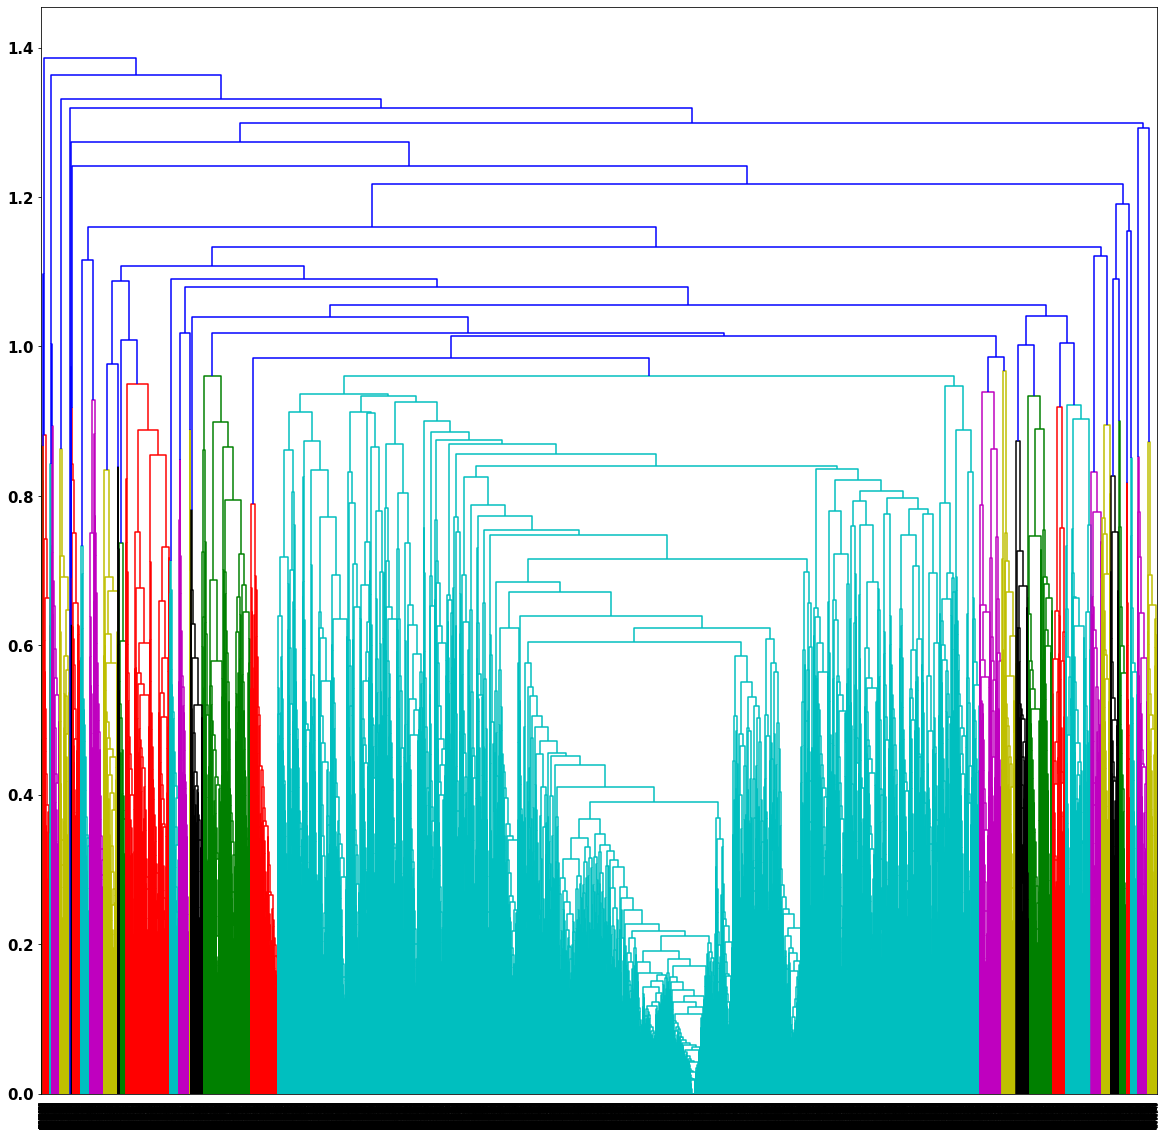

Wall time: 4min 27s


In [14]:
%%time

from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

print("linkage done")
print(x_squared.shape[0])
labelList = range(0, x_squared.shape[0])



plt.figure(figsize=(20, 20))
dend_data = dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [60]:
# Malheureusement, il n'y a pas de manière fiable de déterminer les clusters les plus pertinents avec
# single et complete linkage. On va donc regarder les premiers cluster créés pour avoir une idée
# du fonctionnement de la méthode.

In [134]:
%%time

from scipy.cluster.hierarchy import fcluster

# Tel que vu sur site https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
# La médhoted du code
map_cluster_ids_for_multiple_k = {}

for i in range(2,71):
    map_cluster_ids_for_multiple_k[str(i)] = list(fcluster(linked, i, criterion='maxclust'))

Wall time: 3.27 s


In [86]:
k_2_cluster_ids_per_index = np.array(map_cluster_ids_for_multiple_k['2'])

k2_cluster_1_indices = np.argwhere(k_2_cluster_ids_per_index == 1).flatten()

tweets_k_2_cluster_1 = df_sample["text"][:10000][k2_cluster_1_indices]

k2_cluster_2_indices = np.argwhere(k_2_cluster_ids_per_index == 2).flatten()

tweets_k_2_cluster_2 = df_sample["text"][:10000][k2_cluster_2_indices]

In [84]:
photo_index = tfidf.vocabulary_['photo']

# est ce que le token 'photo' est dans tous les tweets du cluster 1
nb_cluster_1 = len(k2_cluster_1_indices)
nb_cluster_1_photo=np.sum(tfidf_mat[k2_cluster_1_indices][:,photo_index]!=0)
nb_cluster_1_pas_photo=np.sum(tfidf_mat[k2_cluster_1_indices][:,photo_index]!=0)
percent_cluster_1_photo=nb_cluster_1_photo/nb_cluster_1
print("Pourcentage des tweets dans le cluster 1 contenant le token 'photo' ")
print(percent_cluster_1_photo)
print("\n")
print("Voici les tweets du cluster 1 qui n'ont pas le token 'trump':")

# On print les tweets du cluster 1 qui ne possède pas le token 'photo'.
compteur=0
for index in k2_cluster_1_indices:
    value=tfidf_mat[index][:,photo_index]!=0
    if value == False:
        print(index)
        print(df_sample['text'][index])
        print(filtered_tokens[index])
        print('\n')


Pourcentage des tweets dans le cluster 1 contenant le token 'photo' 
0.9523809523809523


Voici les tweets du cluster 1 qui n'ont pas le token 'trump':
4160
Are you following our #Instagram? No? WHAT ARE YOU WAITING FOR! We post daily #pharmaphotos and would love for you… https://t.co/PjDC4xxz4M
['follow', 'wait', 'post', 'daili', 'would', 'love', '…']


4926
Cleveland police: Suspect posted killing video on Facebook  https://t.co/GEbEJ5bfX6
['cleveland', 'polic', 'suspect', 'post', 'kill', 'video', 'facebook']


5695
Up to 14 million Facebook users who thought that they were posting only to friends or family may have shared their… https://t.co/EUAui7ypX4
['million', 'facebook', 'user', 'thought', 'post', 'onli', 'friend', 'famili', 'may', 'share', '…']


9788
I posted a new video to Facebook https://t.co/yGVSO2jslL
['post', 'new', 'video', 'facebook']




C:\Users\Pete\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [88]:
k_3_cluster_ids_per_index = np.array(map_cluster_ids_for_multiple_k['3'])

k3_cluster_1_indices = np.argwhere(k_3_cluster_ids_per_index == 1).flatten()

tweets_k_3_cluster_1 = df_sample["text"][:10000][k3_cluster_1_indices]

k3_cluster_2_indices = np.argwhere(k_3_cluster_ids_per_index == 2).flatten()

tweets_k_3_cluster_2 = df_sample["text"][:10000][k3_cluster_2_indices]

k3_cluster_3_indices = np.argwhere(k_3_cluster_ids_per_index == 3).flatten()

tweets_k_3_cluster_3 = df_sample["text"][:10000][k3_cluster_3_indices]

In [89]:
for tweet in tweets_k_3_cluster_1:
    print(tweet)

ICYMI: Catch Nobel-Prize winner Bob Dylan in a photo exhibit at Monmouth Universtiy! https://t.co/sspZ9IrHTE
Photos: Church lost on 9/11 rises again at World Trade Center https://t.co/k7P13soDRZ https://t.co/s382kEYdqX
Photos: Stony Point Seals Polar Plunge 2017 https://t.co/WGikny7E2m https://t.co/km0LBQKVZA
I posted a new photo to Facebook https://t.co/kskl8w1g7A
Check out this new photo https://t.co/G7CefK8GE7 https://t.co/ejYVE2xZFS
Religious zealots invade spaights plaza. Send us your photos  videos  thoughts. #uwmcrazies
Lewd cellphone photos  test messages evidence in molesting case against #RandolphCounty teenager.… https://t.co/t5iefdLkpP
Photos: 'Sneakerheads' stomp into Santa Clara https://t.co/OffEU5Zdow @SvBizVicki has the pics
Photos: Frenchtown Art Walk https://t.co/p0557PnwsH
I posted 3 photos on Facebook in the album "" http://t.co/aPQz6n8w
#Stagecoach2017: See photos from @johndoefromX's set on Saturday! https://t.co/dm18CV0WOC https://t.co/1q8zNVQAvF
I posted a new p

In [90]:
for tweet in tweets_k_3_cluster_2:
    print(tweet)

'B' Volleyball Roundup: Thunder tops Carrington https://t.co/ikO56oHzpd https://t.co/UiapdTRgXb
Top stories now on https://t.co/Fbzw6mR9Q5: https://t.co/U71CuqRrFQ
Google taps top law firms to fight EU regulatory battles: sources https://t.co/XunHj8UXr4 https://t.co/T3P317ZcRj
RT @LJ_Reyna: After surrendering a double  the Knights leave one stranded on base. Heading to the top of the 3rd  still 0-0.  @SantaMariaTi…
Top stories now on https://t.co/Fbzw6mR9Q5   #NDTVTopStories https://t.co/qrUOXMDyFu
Today is #NationalPancakeDay What are your favorite toppings besides the obvious?
Top stories now on https://t.co/wRqTp39qeH https://t.co/EnEBt9yuLN
RT @ABC7MichelleM: New: Students pass around drink laced with #Xanax Catch the story at the top of the newscasts TONIGHT at 10pm on @NewsCh…
Top stories now on https://t.co/Fbzw6mR9Q5   #NDTVTopStories https://t.co/bUfyJifYjJ
Yankton KOA Reaps Top Honors Again https://t.co/YNaY08Gd6H via @pressanddakotan
#Travel Guide: Top Things to Do in #Portl

In [101]:
top_index = tfidf.vocabulary_['top']

# est ce que le token 'photo' est dans tous les tweets du cluster 1
k3_nb_cluster_2 = len(k3_cluster_2_indices)
k3_nb_cluster_2_top=np.sum(tfidf_mat[k3_cluster_2_indices][:,top_index]!=0)
k3_nb_cluster_2_pas_top=np.sum(tfidf_mat[k3_cluster_2_indices][:,top_index]!=0)
percent_k3_cluster_2_top=k3_nb_cluster_2_pas_top/k3_nb_cluster_2
print("Pourcentage des tweets dans le cluster 1 contenant le token 'top' ")
print(percent_k3_cluster_2_top)
print("\n")
print("Voici les tweets du cluster 1 qui n'ont pas le token 'top':")

# On print les tweets du cluster 1 qui ne possède pas le token 'top'.
compteur=0
for index in k3_cluster_2_indices:
    value=tfidf_mat[index][:,top_index]!=0
    if value == False:
        print(index)
        print(df_sample['text'][index])
        print(filtered_tokens[index])
        print('\n')


Pourcentage des tweets dans le cluster 1 contenant le token 'top' 
1.0


Voici les tweets du cluster 1 qui n'ont pas le token 'top':


In [92]:
for tweet in tweets_k_3_cluster_3:
    print(tweet)

Bodycam video shows Iowa football player searched in park https://t.co/DomJAYRaYD
A decision once seen as a threat to completion of a regional transit network may have ensured just the opposite. https://t.co/rsTWL3eHxJ
All knotted up at 29 with FTs to go for Maumelle  5:37 2Q
Chance the Rapper is facing a lawsuit https://t.co/P9RJvDX3aK
RT @LGAairport: Approximately 736 flights scheduled for today have been canceled due to the nor’easter. Please confirm flight status before…
RT @manojcg4u: BJP used to say GDP will rise. Now we understood GDP stands for Gas  Diesel and Petrol  says @INCIndia leader @KapilSibal. @…
Northwood on Main design unveiled https://t.co/cywynwRRmq
Fast food ... pizza??  http://t.co/Dp62DGAny0
Spartans win both team titles  Trennen Slade captures boys singles title and Kaitlyn Roettger and Sophie Blodgett w… https://t.co/LjXOh2PjLn
And the winning choice for the North County Corridor is... https://t.co/8eMUb4oNRc
@brendan_fischer of @CampaignLegal talks to #NPFPau

Google Doodle Honors Sitara Devi: A Kathak Student Till The End - https://t.co/yfGwOmNNdO https://t.co/EJfsfKyHMW
Jimmy Carter says he voted for @BernieSanders in Dem. primary  doesn't believe Russian activity influenced election… https://t.co/dK3f56rtlH
If you got a spam call about a ‘free cruise ’ you might be owed up to $900 https://t.co/dRZxLV3Tj7
Settler realities: New book spotlights Jewish Americans in the West Bank https://t.co/ibORzNevEs https://t.co/fXYAPmDTke
Steve Wynn’s resignation from atop the casino and resort empire he founded comes after allegations in The Wall Stre… https://t.co/s3Q83cUmSg
Shep Smith rips GOP for trying to blame Dems if government shuts down https://t.co/LdznzS2XOP https://t.co/G8cP0Fdu1Z
Shots fired at Villager Mall  man shows up at hospital with pellet wounds  police say https://t.co/iZ2QdqV5cw
RT @FrankGogola: Lincoln-Way co-op sophomore Barb Belka finishes 12th at state on floor exercise with a 9.250. @LWCKnights @LWWAthletics @L…
McGrath RentCor

Our latest Since You Asked looks at what's happening with the Stouts Creek fire case from last year. https://t.co/7TY339Hvj6
RT @jackholmes0: Why is Wikileaks passing out Michael Wolff's book for free? https://t.co/F1uv5gC4SL
RT @AP: An undercover Iraqi historian led a secret double life to leak Islamic State’s secrets. Now @MosulEye goes public. https://t.co/AJE…
@educationweek UConn expert says #charterschools' growth aided by claims of being both public &amp; private: http://t.co/FiCEBLNGIY | #education
Ronald Koeman released a statement following his sacking by Everton.  Here's what he had to say… https://t.co/dANq2u2dLc
3 officials charged in Flint water crisis #Flint #Michigan #watercrisis #crime #charges #tampering https://t.co/4T13A4jzpB
RT @CurrenceL: @malvernhornetb1 @kelsi_hulit10 @btsohio @TROhio multi sport star Kelsi Hulit becomes Malvern’s all time leading scorer!
Community WSGE 91.7 FM Celebrates Carolina Music Month &amp; Receives Proclamation https://t.co/FVytn1a2IV h

Market for PCs in the U.S. Is Growing  But Global Sales Take a Hit https://t.co/5vftSdtZpS  via @EdMarketBrief… https://t.co/Vu6K0KbI3D
Bashir Not Attending Saudi Summit With Trump: https://t.co/0UbzpY8eOe #Sudan
As arctic air settles in  Animal Rescue League of #Berks County issues Code Blue for #ReadingPA.… https://t.co/DpERSuzz7X
Who says yoga has to be serious? https://t.co/Gr4PjLYyTE
A look at Wednesday's front page for the Bristol Herald Courier. https://t.co/LW7OJHE36B
RT @Lifeblood_Org: Bloodmobile will be at @leader_news Wed-Sat! Donors get $10 off subscription! Hours: Wed-Thurs 9-5  Fri 8-5  Sat 8-3!
Step outside your comfort zone this summer on these 10 outdoor adventures. https://t.co/cBURXp9pX1
After Sally Yates' testimony on Monday  more questions for the Trump White House https://t.co/xAFBC0YSys https://t.co/3sQvOU187y
Commentary by Omar Abdelwahed: "I am a Minnesotan  an American… I was raised here. Ask yourself if this is OK." https://t.co/jIQr5qNWuH
Subscribe to the T

This is no longer Colin Kaepernick's protest. https://t.co/aXh9oE0iV6
Photos: Venice Film Festival kicks off its 74th year https://t.co/TUaNXbxipm
.@TessaJowell receives a standing ovation after giving a speech on cancer in the House of Lords https://t.co/9xfvgJM0A4
Videos: Previewing NFL Thanksgiving games https://t.co/2ScoF6vs6t https://t.co/WrMHgAS9AQ
This might shed some light on that black screen. https://t.co/YILIWQYJbz via @indystar
Adoptable Pet of the Week: Charger #PasoRobles https://t.co/QiCZVrSxHx https://t.co/w2nXQFVrj5
Concord Township resident Douglas Bode was suspended April 5 for six months and demoted https://t.co/rU2NudXY01
#txlege senate budget writers have approved a bill to plug two-year-old funding holes. https://t.co/8RHsgQJGKk https://t.co/MDbZ6bkAgf
Anderson County schools get money for STEM programs https://t.co/F5rY73v6Dw
.@iamkatelynread of #Cary  who sang on @NBCTheVoice  will be at The Cary tonight w/@jeffblackradio. Yay hometown girl http://t.co/NGPCIwz0

Republicans are offering full-throated denouncements of Trump’s military transgender ban https://t.co/UW0uf9UnDe https://t.co/ODsyNtFmlT
RT @shanbow: The @MiamiHerald asked its readers why they #SupportRealNews and also highlighted some answers: https://t.co/rcUPDtHgdv
Local resident amid #Nepal earthquake  safe and uninjured http://t.co/rTlsiMaHD5 @journojess_RCN
Summer in Maine means ice cream and boating  so why not put the two together? | The Forecaster http://t.co/iUYPVDoEhg http://t.co/nfVMG3hMxg
Way to go Jessica Musgrave! She won the 1500 m run at 5:36 @STCTrojans #gotrojans
1913 World War I device draws police to church yard sale https://t.co/cye1QqT5HZ https://t.co/kMYuNeZXH1
File your taxes  then use whatever you have left on these Tax Day bar and restaurant specials.… https://t.co/9XE8fv8BWX
Make Golf Courses Useful Again https://t.co/pb804cvjia
RT @ElaineReyesTV: Celebrating #MidAutumnFestival with #Mooncakes #MoonFestival  @cgtnamerica https://t.co/OtDYyUhh6a
Agent: Inspe

In [93]:
k_4_cluster_ids_per_index = np.array(map_cluster_ids_for_multiple_k['4'])

k4_cluster_1_indices = np.argwhere(k_4_cluster_ids_per_index == 1).flatten()

tweets_k_4_cluster_1 = df_sample["text"][:10000][k4_cluster_1_indices]

k4_cluster_2_indices = np.argwhere(k_4_cluster_ids_per_index == 2).flatten()

tweets_k_4_cluster_2 = df_sample["text"][:10000][k4_cluster_2_indices]

k4_cluster_3_indices = np.argwhere(k_4_cluster_ids_per_index == 3).flatten()

tweets_k_4_cluster_3 = df_sample["text"][:10000][k4_cluster_3_indices]

k4_cluster_4_indices = np.argwhere(k_4_cluster_ids_per_index == 4).flatten()

tweets_k_4_cluster_4 = df_sample["text"][:10000][k4_cluster_4_indices]

In [94]:
for tweet in tweets_k_4_cluster_1:
    print(tweet)

ICYMI: Catch Nobel-Prize winner Bob Dylan in a photo exhibit at Monmouth Universtiy! https://t.co/sspZ9IrHTE
Photos: Church lost on 9/11 rises again at World Trade Center https://t.co/k7P13soDRZ https://t.co/s382kEYdqX
Photos: Stony Point Seals Polar Plunge 2017 https://t.co/WGikny7E2m https://t.co/km0LBQKVZA
I posted a new photo to Facebook https://t.co/kskl8w1g7A
Check out this new photo https://t.co/G7CefK8GE7 https://t.co/ejYVE2xZFS
Religious zealots invade spaights plaza. Send us your photos  videos  thoughts. #uwmcrazies
Lewd cellphone photos  test messages evidence in molesting case against #RandolphCounty teenager.… https://t.co/t5iefdLkpP
Photos: 'Sneakerheads' stomp into Santa Clara https://t.co/OffEU5Zdow @SvBizVicki has the pics
Photos: Frenchtown Art Walk https://t.co/p0557PnwsH
I posted 3 photos on Facebook in the album "" http://t.co/aPQz6n8w
#Stagecoach2017: See photos from @johndoefromX's set on Saturday! https://t.co/dm18CV0WOC https://t.co/1q8zNVQAvF
I posted a new p

In [95]:
for tweet in tweets_k_4_cluster_2:
    print(tweet)

'B' Volleyball Roundup: Thunder tops Carrington https://t.co/ikO56oHzpd https://t.co/UiapdTRgXb
Top stories now on https://t.co/Fbzw6mR9Q5: https://t.co/U71CuqRrFQ
Google taps top law firms to fight EU regulatory battles: sources https://t.co/XunHj8UXr4 https://t.co/T3P317ZcRj
RT @LJ_Reyna: After surrendering a double  the Knights leave one stranded on base. Heading to the top of the 3rd  still 0-0.  @SantaMariaTi…
Top stories now on https://t.co/Fbzw6mR9Q5   #NDTVTopStories https://t.co/qrUOXMDyFu
Today is #NationalPancakeDay What are your favorite toppings besides the obvious?
Top stories now on https://t.co/wRqTp39qeH https://t.co/EnEBt9yuLN
RT @ABC7MichelleM: New: Students pass around drink laced with #Xanax Catch the story at the top of the newscasts TONIGHT at 10pm on @NewsCh…
Top stories now on https://t.co/Fbzw6mR9Q5   #NDTVTopStories https://t.co/bUfyJifYjJ
Yankton KOA Reaps Top Honors Again https://t.co/YNaY08Gd6H via @pressanddakotan
#Travel Guide: Top Things to Do in #Portl

In [96]:
for tweet in tweets_k_4_cluster_3:
    print(tweet)

Bodycam video shows Iowa football player searched in park https://t.co/DomJAYRaYD
A decision once seen as a threat to completion of a regional transit network may have ensured just the opposite. https://t.co/rsTWL3eHxJ
All knotted up at 29 with FTs to go for Maumelle  5:37 2Q
Chance the Rapper is facing a lawsuit https://t.co/P9RJvDX3aK
RT @LGAairport: Approximately 736 flights scheduled for today have been canceled due to the nor’easter. Please confirm flight status before…
RT @manojcg4u: BJP used to say GDP will rise. Now we understood GDP stands for Gas  Diesel and Petrol  says @INCIndia leader @KapilSibal. @…
Northwood on Main design unveiled https://t.co/cywynwRRmq
Fast food ... pizza??  http://t.co/Dp62DGAny0
Spartans win both team titles  Trennen Slade captures boys singles title and Kaitlyn Roettger and Sophie Blodgett w… https://t.co/LjXOh2PjLn
And the winning choice for the North County Corridor is... https://t.co/8eMUb4oNRc
@brendan_fischer of @CampaignLegal talks to #NPFPau

Now that's a fine-looking crew! 🙌@EdwerderRFA @kevinkugler &amp; Hall of Famer Dan Fouts will call the… https://t.co/hN9eE58J9W
Catholic pastor of Plainfield parish shares his thoughts as he prepares for transfer https://t.co/BJhmef72HY
U-12 girls whitewash Southington  5-0 https://t.co/AZXvreAOdl https://t.co/04Xfsmn4Xm
Michigan woman dies in crash in Ashland County https://t.co/dZGafLnLRL https://t.co/PIAjfAltJA
A hormone injection for men has been shown to be 96% effective as contraception. https://t.co/eLhBiPgwVH
Sasol $SSL Receives Daily News Sentiment Rating of 0.12 https://t.co/PV08pnytY8 #stocks
Teens to stage 'Peter Pan' in #FlorhamPark. https://t.co/CtU18Y05g2
St. Louis  don’t get played on ‘fake CBAs’ like Detroit did https://t.co/jCBaolNDTM https://t.co/e6CMdjMiIj
#ExpressOpinion The government demonstrated sensitivity by not only meeting the protesters and cracking down on the… https://t.co/ICuHUTLpUI
Logan County missing man found safe. FULL DETAILS: https://t.co/G5wSQ5eO

Our latest Since You Asked looks at what's happening with the Stouts Creek fire case from last year. https://t.co/7TY339Hvj6
RT @jackholmes0: Why is Wikileaks passing out Michael Wolff's book for free? https://t.co/F1uv5gC4SL
RT @AP: An undercover Iraqi historian led a secret double life to leak Islamic State’s secrets. Now @MosulEye goes public. https://t.co/AJE…
@educationweek UConn expert says #charterschools' growth aided by claims of being both public &amp; private: http://t.co/FiCEBLNGIY | #education
Ronald Koeman released a statement following his sacking by Everton.  Here's what he had to say… https://t.co/dANq2u2dLc
3 officials charged in Flint water crisis #Flint #Michigan #watercrisis #crime #charges #tampering https://t.co/4T13A4jzpB
RT @CurrenceL: @malvernhornetb1 @kelsi_hulit10 @btsohio @TROhio multi sport star Kelsi Hulit becomes Malvern’s all time leading scorer!
Community WSGE 91.7 FM Celebrates Carolina Music Month &amp; Receives Proclamation https://t.co/FVytn1a2IV h

Utopia to perform at Hard Rock Live in May https://t.co/HeQwitsxNx
RT @lawcrimenews: 30-year-old man told by court he has to move out of parents' home tells his side of things: ‘I don’t like living here’ ht…
EXCLUSIVE: Why Blac Chyna hasn’t yet filed a police report yet https://t.co/Oo13AV9vs8 https://t.co/8g2NYneMV6
@BarbaraJaylee A Saturday well spent if you ask us! #imposters
Groupon  Inc. $GRPN Stock Rating Reaffirmed by Cowen and Company https://t.co/rXS7t0KSrN
Dozens of transgender Texans turn out to oppose state Senate's #bathroombill #txlege  https://t.co/WY3Wmt0fJN
RT @blakeapgar: There are about 150 people here. Hundreds of others on camp are getting supplies ready  grabbing food..
Tox Box to close for season https://t.co/aORyTWcffg
RT @chitribsuburbs: In suburban Cook County  2 First Midwest Bank branches to close in Arlington Heights  and 2 each in Calumet City  Park…
Trick or treat! Here's a list of cruddy candy to avoid this Halloween https://t.co/9yIEvOwllZ
Tinder’s new 

Editorial: Trump's removal of protections will let companies charge more than 16 percent interest on student loans. https://t.co/HjwIn4ndWd
ICYMI: Dockless scooters have arrived in Arlington https://t.co/Uzvc1bdBBg https://t.co/67PCPqSS1X
“This art gallery isn’t being singled out. Nothing is being destroyed here." https://t.co/bz70if4zNg
RT @austin_colbert: Bummer breaking news. Updated men's ski superpipe start list does NOT include Aspen's Alex Ferreira. No word why the la…
'Biggest threat to the west': Australian journalist demolishes Trump after G20 https://t.co/L5gxIZ7CFh
Fully ft. Meek Gucciano &amp; J-Shin - Take Your Chic... https://t.co/oZ3XaUHcPP
RT @ArizonaDOT: REOPENED: SR 51 NB from Bell to L-101 after pavement work. We'll reopen sections from north to south as work progresses tod…
Street Smart https://t.co/o3AXsjbEtj via @YouTube
RT @marta_explorer: Spontaneous snowball fight at North Springs. #HowDoYouMARTA @ North Springs station https://t.co/72Cus3BbfB
UPDATE: Apple Ju

RT @NWSKansasCity: Heat indices already rising through the upper 90s  on its way towards the 105° to 110° range today. Stay cool &amp; stay saf…
Florence ready to finally start their season https://t.co/whf0nt5qi7
10 things to know today  via @AP https://t.co/6Rdg6nnRQw https://t.co/R8nSNWKIZ3
NFL Team Not Going Downtown http://t.co/2490RzCWAv
Alamogordo hiker dies after falling into canyon https://t.co/ChQpetWCsE
RT @TheChamberHEB: Fort Worth Business Press is looking for Tarrant County's Oldest Businesses | @fwbusinesspress  http://t.co/BU5tALSZxI
Egyptian pop star croons for potential visitors on Europe tour https://t.co/T0W8i9a7PD
Rock Valley man pleads not guilty to murder https://t.co/IWneNRkPva https://t.co/pppfWplDAF
RT @sdut: Today in in one photo. Today in one word: Wow. (via @BrookTaylorCA) http://t.co/Eydw5fcuaz
Green Bay men arraigned in home invasion - EH Extra http://t.co/WsleGV55LG
The #GreatestShowman is a whole new level of disingenuousness https://t.co/Tqxu44plg3
Vis

In [97]:
for tweet in tweets_k_4_cluster_4:
    print(tweet)

World Space Week to wow attendees https://t.co/9qmgZvLXu5 https://t.co/oKOzBEp8xZ
Commentary: Imagine the fun residents could have: Hat’s off to Suzanne Griep Farley in the column a few weeks ... http://t.co/2oKGguqtds
Question of the Week: What cult would you join?
ROUND THREE &amp; Spring starts in ONE WEEK. The third snow storm -March 13- in less than 2 weeks brought 4.5" to White… https://t.co/zAr4dUHA5L
This week's MinnPost Quiz on libraries  lawsuits and labor is live! https://t.co/PvcN7IuO7k
Cabot will play LR central next week in 7A playoffs. Tigers beat 2time state champion Fayetteville
A doctor told Satchel Paige he would never pitch again. Paige proved him wrong in this week's MOzarks Moments. https://t.co/oKl6m1nYNH
Project of the Week: Delta Dental of Washington https://t.co/T5lQ2jr1o4 https://t.co/BE7fK3b7QT
Raiders quarterback Derek Carr has a spinal fracture  will miss 2-6 weeks https://t.co/CAFnJ7whZj https://t.co/Hg6WPxpDXc
This week's online edition of The Times Disp

In [102]:
week_index = tfidf.vocabulary_['week']

# est ce que le token 'photo' est dans tous les tweets du cluster 1
k4_nb_cluster_4 = len(k4_cluster_4_indices)
k4_nb_cluster_4_week=np.sum(tfidf_mat[k4_cluster_4_indices][:,week_index]!=0)
k4_nb_cluster_4_pas_week=np.sum(tfidf_mat[k4_cluster_4_indices][:,week_index]!=0)
percent_k4_cluster_4_week=k4_nb_cluster_4_pas_week/k4_nb_cluster_4
print("Pourcentage des tweets dans le cluster 4 contenant le token 'week' ")
print(percent_k4_cluster_4_week)
print("\n")
print("Voici les tweets du cluster 1 qui n'ont pas le token 'week':")

# On print les tweets du cluster 1 qui ne possède pas le token 'week'.
compteur=0
for index in k4_cluster_4_indices:
    value=tfidf_mat[index][:,week_index]!=0
    if value == False:
        print(index)
        print(df_sample['text'][index])
        print(filtered_tokens[index])
        print('\n')

Pourcentage des tweets dans le cluster 4 contenant le token 'week' 
1.0


Voici les tweets du cluster 1 qui n'ont pas le token 'week':


In [104]:
k_5_cluster_ids_per_index = np.array(map_cluster_ids_for_multiple_k['5'])

k5_cluster_1_indices = np.argwhere(k_5_cluster_ids_per_index == 1).flatten()

tweets_k_5_cluster_1 = df_sample["text"][:10000][k5_cluster_1_indices]

k5_cluster_2_indices = np.argwhere(k_5_cluster_ids_per_index == 2).flatten()

tweets_k_5_cluster_2 = df_sample["text"][:10000][k5_cluster_2_indices]

k5_cluster_3_indices = np.argwhere(k_5_cluster_ids_per_index == 3).flatten()

tweets_k_5_cluster_3 = df_sample["text"][:10000][k5_cluster_3_indices]

k5_cluster_4_indices = np.argwhere(k_5_cluster_ids_per_index == 4).flatten()

tweets_k_5_cluster_4 = df_sample["text"][:10000][k5_cluster_4_indices]

k5_cluster_5_indices = np.argwhere(k_5_cluster_ids_per_index == 5).flatten()

tweets_k_5_cluster_5 = df_sample["text"][:10000][k5_cluster_5_indices]

In [105]:
for tweet in tweets_k_5_cluster_1:
    print(tweet)

ICYMI: Catch Nobel-Prize winner Bob Dylan in a photo exhibit at Monmouth Universtiy! https://t.co/sspZ9IrHTE
Photos: Church lost on 9/11 rises again at World Trade Center https://t.co/k7P13soDRZ https://t.co/s382kEYdqX
Photos: Stony Point Seals Polar Plunge 2017 https://t.co/WGikny7E2m https://t.co/km0LBQKVZA
I posted a new photo to Facebook https://t.co/kskl8w1g7A
Check out this new photo https://t.co/G7CefK8GE7 https://t.co/ejYVE2xZFS
Religious zealots invade spaights plaza. Send us your photos  videos  thoughts. #uwmcrazies
Lewd cellphone photos  test messages evidence in molesting case against #RandolphCounty teenager.… https://t.co/t5iefdLkpP
Photos: 'Sneakerheads' stomp into Santa Clara https://t.co/OffEU5Zdow @SvBizVicki has the pics
Photos: Frenchtown Art Walk https://t.co/p0557PnwsH
I posted 3 photos on Facebook in the album "" http://t.co/aPQz6n8w
#Stagecoach2017: See photos from @johndoefromX's set on Saturday! https://t.co/dm18CV0WOC https://t.co/1q8zNVQAvF
I posted a new p

In [106]:
for tweet in tweets_k_5_cluster_2:
    print(tweet)

'B' Volleyball Roundup: Thunder tops Carrington https://t.co/ikO56oHzpd https://t.co/UiapdTRgXb
Top stories now on https://t.co/Fbzw6mR9Q5: https://t.co/U71CuqRrFQ
Google taps top law firms to fight EU regulatory battles: sources https://t.co/XunHj8UXr4 https://t.co/T3P317ZcRj
RT @LJ_Reyna: After surrendering a double  the Knights leave one stranded on base. Heading to the top of the 3rd  still 0-0.  @SantaMariaTi…
Top stories now on https://t.co/Fbzw6mR9Q5   #NDTVTopStories https://t.co/qrUOXMDyFu
Today is #NationalPancakeDay What are your favorite toppings besides the obvious?
Top stories now on https://t.co/wRqTp39qeH https://t.co/EnEBt9yuLN
RT @ABC7MichelleM: New: Students pass around drink laced with #Xanax Catch the story at the top of the newscasts TONIGHT at 10pm on @NewsCh…
Top stories now on https://t.co/Fbzw6mR9Q5   #NDTVTopStories https://t.co/bUfyJifYjJ
Yankton KOA Reaps Top Honors Again https://t.co/YNaY08Gd6H via @pressanddakotan
#Travel Guide: Top Things to Do in #Portl

In [107]:
for tweet in tweets_k_5_cluster_3:
    print(tweet)

Bodycam video shows Iowa football player searched in park https://t.co/DomJAYRaYD
A decision once seen as a threat to completion of a regional transit network may have ensured just the opposite. https://t.co/rsTWL3eHxJ
All knotted up at 29 with FTs to go for Maumelle  5:37 2Q
Chance the Rapper is facing a lawsuit https://t.co/P9RJvDX3aK
RT @LGAairport: Approximately 736 flights scheduled for today have been canceled due to the nor’easter. Please confirm flight status before…
RT @manojcg4u: BJP used to say GDP will rise. Now we understood GDP stands for Gas  Diesel and Petrol  says @INCIndia leader @KapilSibal. @…
Northwood on Main design unveiled https://t.co/cywynwRRmq
Fast food ... pizza??  http://t.co/Dp62DGAny0
Spartans win both team titles  Trennen Slade captures boys singles title and Kaitlyn Roettger and Sophie Blodgett w… https://t.co/LjXOh2PjLn
And the winning choice for the North County Corridor is... https://t.co/8eMUb4oNRc
@brendan_fischer of @CampaignLegal talks to #NPFPau

#BREAKING: Credit card skimming device found at an Englewood Sunoco station. More information to come.
Rock icon Johnny Hallyday  known as French Elvis  dies at 74 https://t.co/iDRgztNb4g https://t.co/JeTVUNp7vZ
As Trump shakes things up for journalists and news consumers  @DavidFolkenflik says “we’ve got to pace ourselves”: https://t.co/jKMXMCOWpc
Wisconsin health officials look at preventing elderly falls https://t.co/j5jzZlpj8V
RT @CBSNews: HAPPENING SOON: Sen. Al Franken is addressing the Senate amid a wave of calls for his resignation following repeated allegatio…
'Bachelor in Paradise' contestant says he was fired from his job https://t.co/d877H2wIbk https://t.co/AdgmVSUwYf
.@Harvard faces DOJ probe over its affirmative-action policies https://t.co/zJn4Qj0ToH https://t.co/y7Ak84v2Wx
The Trump administration should heed small business' concerns on association health plans https://t.co/jcFcSGEMxs
The City of Madison Board of Public Works special meeting that was scheduled for today

Harvest Capital Management Inc Continues to Hold Stake in McDonald's Co. $MCD https://t.co/u2P6tQiOwX
Some worry that a plan to install parking meters downtown could “ruin the mall” by adding to impression that there'… https://t.co/KeGAFtaIln
Australian company picks Louisiana for $25M graphite processing facility https://t.co/IoBnP7e69d https://t.co/Q07Y4tzZKV
Akron Dish: Ramp Restaurant coming to Portage Lakes; Waterloo’s new ice cream stand; 17 Public Square opens in Medi… https://t.co/ytq9V0PZgW
Car rams Charlottesville crowd after protests: What we know now https://t.co/3u8TKpnVF2 via @azcentral
One study said the Baltimore economy is losing $325 million a year because of transportation problems. https://t.co/1ZXBFpNI6H
Denver employs "Goosinator" robots  not to be confused with the splendid statue atop @LeftHandBrewing in Longmont. https://t.co/6rX4ikFnfH
Driver in fatal #Saugerties crash is charged with vehicular manslaughter https://t.co/8H2bsZHhVw
Yoga part of everyday life in

News: Community yard sale planned at The Grove - There will be a community yard sale from 8 a.m. to 2 p.m. Saturda... http://t.co/zC4VO46xmu
Trump travels to his private golf course for fifth straight day https://t.co/dzdzb3gXco https://t.co/FOt0MKApVS
Washington v. Trump https://t.co/jDCNAduUuI via @EricAPosner
The number of cases in the E. coli outbreak tied to Romaine lettuce grown in Arizona has boomed to 84 in 19 states. https://t.co/0gJi9IExez
A project that will bring a new Popeye's and Burger King to Fort Hood is slated for completion in April. https://t.co/IGLgrGiwjt
RT @hbwx: The fall weeds and mold spores in DC...not good! @wusa9 @TenaciousTopper @reddusfoximus https://t.co/ICtWz84Z2D
Anthony Scaramucci is the ex-Trump aide we’ve been waiting for https://t.co/R2NjTLiNVs
New SoFi CEO Anthony Noto on the 3 things his fintech company must do to outpace competition https://t.co/fCsWhuVs9g
RT @CBryce2015: Central 38  Timber Creek 14  8:21 3rd  #BlitzWTFB
Tune in to @AirTalk at 11

ICYMI: JKH Holdings joins Microsoft  others at Ashburn’s ‘Smart City’ | https://t.co/4gOHU0hChn… https://t.co/nxYQnVoRlJ
Good morning! Start off your day by guessing this week's Waltham Watcher: http://t.co/IxdjxkoNoR
The cast of Jersey Shore is coming back together for a new reality series. https://t.co/zc9SRGq6Dw
God is good all the time  all the time  God is good!!! Watch The 700 Club online for proof of just how good He is:  https://t.co/00pupR06xQ
Op-Ed: The NFL can't ethically endorse tackle football for kids. https://t.co/YQyPgiWfxJ https://t.co/FIdi7vTQzl
Police believe body found in river is likely missing New Hampshire teen  https://t.co/7ApcaAumtg
Area delegation visits the last leg of Pope Francis trip to United States. http://t.co/iwmlCvIeFc
The Doctrine of Discovery is an artificial lie that was thought out of the mind of a white man. It's a mythical idea &amp; we are following it.
Mona Lisa unveiled? Nude sketch may have link to masterpiece https://t.co/NTCjCQh4lC https:

RT @ToddBragstadMBJ: Industrial brokers check out former J.C. Penney building in Wauwatosa: Slideshow https://t.co/eOc822JDfF via @MKEBizJo…
“It is unsettling to think there would be major cuts  and the problem is that we don’t have clear details on what... https://t.co/qELCo8B3DD
Ag Insider today: Trump's nutrition cuts; seed vault flooded; and pursuit of E15 https://t.co/wqPdjmPuVn
Believed to be dead in cyclone Ockhi  missing man returns home after 3 months https://t.co/JkThKyeTPY via… https://t.co/qbvGhWt7Uj
Due to an increasing amount of applicants  the Pioneer Leadership Program is set to expand. http://t.co/NojwvkdF7S
Egypt's Morsi sentenced to life in espionage trial https://t.co/OrktLYdimD https://t.co/YoVHL6rLOX
No  NASA is not hiding kidnapped children on Mars https://t.co/dTFCAfQlKP https://t.co/doN0w7aG6o
$2.2M Netherwood Avenue Bridge replacement OK'd https://t.co/kzdGXKWhog
Happy Birthday from the 47ABC team!   To join the Good Morning Delmarva birthday club for free  re

Romney has won AL  now in the lead 76-64. However  this is just the calm before the storm. #MUelections
MURPHY: Vikings need to finish cutting ties with Adrian Peterson https://t.co/zXPj1RRjSl https://t.co/ooiNRhBEoE
Do you have a video you would like featured? - Click Here to Submit Your Video https://t.co/OlPqy8K19S ...... https://t.co/Kfz8EmoDhn
RT @MDLottery: Go for glory with Powerball. Grab your ticket today and take your shot! https://t.co/UccETUqNzK
The @BhamBizJrnl will honor the best small businesses in the Magic City on July 27 at @HarbertCenter - https://t.co/Si1gOaZZJq
What's on Main?: McNeely Accounting &amp; Tax Service is located at 135 S. Main St.: Editor’s note: This fall  The... http://t.co/isksT9sbtv
Goldman Sachs' young analysts pitch the CEO and firm's leaders for $150 000 for charity https://t.co/ZFhdiNaIH6 by… https://t.co/6M7rk6REeb
First Nations want to set own rules for cannabis sales https://t.co/ivYWFqzEdG From @glorgal @GlobePolitics #cdnpoli
This is almos

In [108]:
for tweet in tweets_k_5_cluster_4:
    print(tweet)

Police  Fire Reports 8/7/2009 - http://bit.ly/179M9L


In [109]:
for tweet in tweets_k_5_cluster_5:
    print(tweet)

World Space Week to wow attendees https://t.co/9qmgZvLXu5 https://t.co/oKOzBEp8xZ
Commentary: Imagine the fun residents could have: Hat’s off to Suzanne Griep Farley in the column a few weeks ... http://t.co/2oKGguqtds
Question of the Week: What cult would you join?
ROUND THREE &amp; Spring starts in ONE WEEK. The third snow storm -March 13- in less than 2 weeks brought 4.5" to White… https://t.co/zAr4dUHA5L
This week's MinnPost Quiz on libraries  lawsuits and labor is live! https://t.co/PvcN7IuO7k
Cabot will play LR central next week in 7A playoffs. Tigers beat 2time state champion Fayetteville
A doctor told Satchel Paige he would never pitch again. Paige proved him wrong in this week's MOzarks Moments. https://t.co/oKl6m1nYNH
Project of the Week: Delta Dental of Washington https://t.co/T5lQ2jr1o4 https://t.co/BE7fK3b7QT
Raiders quarterback Derek Carr has a spinal fracture  will miss 2-6 weeks https://t.co/CAFnJ7whZj https://t.co/Hg6WPxpDXc
This week's online edition of The Times Disp

In [160]:
# On voit que les méthodes single et complete linkage regroupe ensemble les tweets qui se ressemble le plus,
# mais qu'il n'apportent pas de regroupement des mots périphériques, du moins dans les premiers clusters.
# Ensuite, regardons un cluster plus haut dans la hiérarchie (disons k = 40) pour voir si on réussi à avoir
# un sujet révélateur.

k_40_cluster_ids_per_index = np.array(map_cluster_ids_for_multiple_k['40'])

list_cluster_indices = []

for i in range(1, 41):
    list_cluster_indices.append(len(np.argwhere(k_40_cluster_ids_per_index == i)))

#allons essayer de trouver une constante chez les 5 plus gros clusters à k = 40
biggest_cluster_indices_for_k = np.array(list_cluster_indices).argsort()[-5:][::-1]

cluster_size_postion = 0

for i in biggest_cluster_indices_for_k:
    cluster_size_postion += 1
    i_biggest_cluster_indices = np.argwhere(k_40_cluster_ids_per_index == i).flatten()
    tweets_k_40_i_biggest_cluster = df_sample["text"][:10000][i_biggest_cluster_indices]
    print("cluster size order : " + str(cluster_size_postion) + "\r\n\r\n")
    for tweet in tweets_k_40_i_biggest_cluster:
        print(tweet)

#Pas de constante!

cluster size order : 1


RT @jacques_pepin: READ: How Legendary French Chef Jacques Pépin Makes A Perfect Omelette via @Buzzfeed https://t.co/DJUFmBJ40L https://t.c…
I started a live stream on @YouTube: https://t.co/uExpsYhx1B
Cardi B finally revealed her pregnancy to the world on #SNL last night https://t.co/IX3eDt4jyH
GOP passed the death penalty bill in the middle of the night last year. Dems now in charge  quash it. Less drama: https://t.co/gLTAHcSDFD
RT @SarahBatcha: This guy understands the magic of #Coachella at night. #CoachellaFashion maybe? https://t.co/oiZnXDfs9z
Making tracks https://t.co/EnZVDIXstN
RT @OTHChris: Make sure to pick up a copy of today's OTH for more on the McDonald's story http://t.co/J57cpOaPaS
Reason to make possession of demonetised currency offence is that once it seizes to be legal tender can't allow parallel economy: FM in LS
Do exam results really matter? – live debate https://t.co/1bkavREn4I
Ryan Gosling can't whistle - and other things we learned abo

Husband Celebrates the Life of Linda Richardson Through Clarion Forest VNA Hospice - https://t.co/VZeJQJ30rQ https://t.co/37t1pKuqfv
3 000 mile hikers Left to right  sisters Jo Knezacek and Mug Knezacek on the final leg of their 3 000 mile hike... http://t.co/T5HHGEptEk
Temperatures to reach 90 degrees Wednesday https://t.co/IWIqWxyhKz
Horseshoe Bend advances to regional championship: https://t.co/8WTnlhn66q via @YouTube
Payton Jon  submitted by Bill and Natalie Felkner. http://t.co/13nxl3ys
RT @TylerHersko: The House passed the GOP tax bill. I wrote about its potential local impact for the @vcstar earlier this month. ICYMI: htt…
RT @dcexaminer: NEW: House Obamacare repeal bill meets Senate rules for simple majority vote https://t.co/FleDpdxA0O https://t.co/xu2SXOVeK0
Japan's government orders drugmaker Kaketsuken to suspend operations over unethical manufacturing processes. https://t.co/XzdX6Y7oyT
Check out this story in the Tuesday Salem News: Tanker truck firm to move operations  50

Success story: First nesting ospreys call Janesville home https://t.co/taWcamiDml
Robert Durst's attorney says he was interviewed without his lawyers present: https://t.co/4nYmtsYyiN https://t.co/DBMUNyCg5U
Central graduate wins new Dodge Dart http://t.co/SwOb5i4ARe
Mark Halperin out at NBC after five women accuse him of sexual harassment https://t.co/uAqiFRbPoS
Trump Doubles Down on MS-13 Criticism: 'I Refer to Them as Animals --- and I Always Will' https://t.co/ANtXsdRyjs https://t.co/2TJmBm9cg8
Uncertainty continues in Hartford: HARTORD — Senate President Martin M. Looney  D-New Haven  remained uncertain if…… https://t.co/av9dxwdDmv
BREAKING: Tillerson says after Trump-Putin meeting that Russia has asked for proof of involvement in election interference.
Independence Day: National anthem sung on PH Rise https://t.co/4Pw4nl6s4z https://t.co/taYsP57EaJ
@WeinbergLindsay argues that Horan's latest album is a little too close to his boy band roots.… https://t.co/HtwRUrBUHp
Bad news for t

Listen up! These wireless earbuds will sharpen your hearing https://t.co/YWSAe12Xcn https://t.co/LhdeBjRMBS
Now @Instacart's chief marketing officer has left the company https://t.co/ZxDZlbUwHX https://t.co/jhz0CNb6m7
Never again. https://t.co/oNAVUMrLPw
Universal Launches New Handling Service in the Maldives. #ABACE17 #bizav https://t.co/BKeQE7UurB
#Newsmakers with @RepAdamSmith  questions from @LeoShane &amp; @rtiron - NOW on C-SPAN https://t.co/BUVinmgHvI https://t.co/2zrYtnaa2h
Walmart Closes Doors to Alipay in Western China https://t.co/AC42ciA4AO https://t.co/rR8OGMfDr7
Melania Trump meets Prince Harry on first solo trip as first lady https://t.co/y4qR8T6dPs https://t.co/TQ6zRc8tAT
Line-up set for Main Street Laurens Christmas Parade https://t.co/cNG3PQxHHs https://t.co/ndyPpt7ERj
RT @TheMomsBeat: Checking out eclipse outside of work - sharing the one set of glasses. https://t.co/ahmTJLChXp
Take a minute to get to know Larry Carroll  one of East Multnomah County's Extraordinary C

Channel 20 is obliged to present diverse viewpoints and opinions. Many viewers felt it wasn't doing so. https://t.co/y33ViCcfZn
Tom Price is out  so it's time to get to know new HHS Secretary Don J. Wright https://t.co/fMfURyfeYB https://t.co/OnyTC5VC23
Celebrating MLK by doing for others https://t.co/8ahfQA6Fks
Law enforcement urges local religious institutions to increase #security http://t.co/Hfg0d0y7Th #Dearborn
Prep roundup: Lady Wave rolls on in Narrows https://t.co/Sv1HrAB3HG
Zacks Investment Research Lowers First Bancshares $FBMS to Sell https://t.co/ogfCno6MyI #stocks
'You leave my husband alone!': Elaine Chao  Mitch McConnell confronted over family separations https://t.co/vP9luMoHfP
One in five American households have ‘zero or negative’ wealth https://t.co/qzbuffKwAu https://t.co/BqMURPM8DZ
A look at notable Nobel literature winners from the past https://t.co/W6dD03CeWO
The Energy 202: Energy bill could be Trump's first big win https://t.co/D5N3fQvRGA
Pope shocks Chile by a

Say Yes is a chance to break the cycle of intergenerational poverty through an innovative investment in education. https://t.co/Oa6rnSF23d
Local band @HilLikElephants​ strip down their sound for a new album to be released this Friday at @CasbahSanDiego​: http://t.co/wKvWg9GcIu
RT @GallupNews: 12% of Republicans approve of the job Congress is doing... https://t.co/0ekCgHyQP0 #GallupDaily https://t.co/UIhgHpJUZJ
Santa Came Early to Rawhide Rustic and You Get the Savings - https://t.co/09W6miCIwg
As husband mourns  businesses rally to support family of woman killed in crash https://t.co/nprg34NANO https://t.co/hWObnvvI5Y
RT @DrMarioRGarcia: Why @DIEZEIT and @parool are the two best designed newspapers in the world: special edition of my blog; https://t.co/eI…
Why China’s electric car goal is turning into a boon for SUV makers https://t.co/1KEtqZjwNY
Are Timeshares Worth It? Possibly  if You Buy Smart https://t.co/FLFqevanER https://t.co/elovcFcZUB
Lawmaker calls Likud MK ‘friend of Nazis’